In [2]:
%matplotlib notebook
%pylab


Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


Time variant solution 

<IPython.core.display.Javascript object>


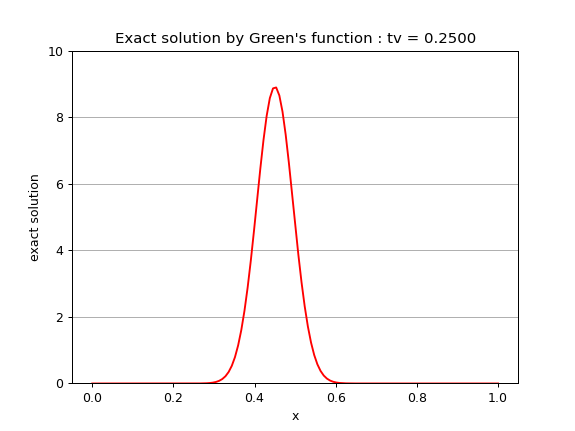

In [66]:
from scipy.special import erf

epsilon= 0.001
def Heatkernel(x):
    return (1/sqrt(4*np.pi*epsilon)*exp(-x**2/(4*epsilon)))
def heaviside_heat(x):
    a = 1e-6
    # return 1/2 + 1/2*erf((x)/((4*a)*(0.5)))   
    return 0.5 + 0.5*erf(x/sqrt(4*a))
c=1
a=0
b=1
N = 128   # Compute N, then compute 
# dx=0.01
dx = (b-a)/N
t0=0
T=0.25
M = 20
t= linspace(t0,T,M+1)
# x=linspace(a,b,M+1)
x=linspace(a,b,N+1)
def Gfunct(x,t,si,tau):
    return Heatkernel(x-si-c*(t-tau))*heaviside_heat(t-tau)
si = 0.3
tau=0.1
# Qhat = zeros((len(t),len(x)))
Qhat= zeros((M+1,N+1))
for n in range(M+1):
    for j in range(N+1):
        # Qhat[n,j] = Gfunct(t[n],x[j],si,tau)
        Qhat[n,j] = Gfunct(x[j],t[n],si,tau)
fig = figure(1)
clf()
hdl, = plot(x,Qhat[0],'r')
tv = t[0]
tstr = 'Exact solution by Green\'s function : tv = {:.4f}'.format
htitle = title(tstr(0))
xlabel('x')
ylabel('exact solution')
htitle.set_text(tstr(tv))
grid(axis='y')
for m in range(M+1):
    hdl.set_ydata(Qhat[m])
    ylim([0,10])
    tv = t[m]
    htitle.set_text(tstr(tv))
    fig.canvas.draw()   
    pause(0.2) 
show()

Solution to the advection equation